In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3

In [2]:
normal_data1 = pd.read_csv('NormalTest3.csv')
normal_data2 =pd.read_csv("NormalTest2.csv")
normal_data3 =pd.read_csv("Normal1.csv")
normal_data4 =pd.read_csv("Normal2.csv")


In [3]:
df9 = pd.concat([normal_data1,normal_data2,normal_data3,normal_data4])

In [4]:
df9

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399,Normal
1,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622,Normal
2,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544,Normal
3,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513,Normal
4,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344,Normal
...,...,...,...,...,...,...,...,...,...,...
1581,0.537,-0.898,-0.114160,0.098503,0.150782,0.028876,1.562956,3.561441,-1.320794,Normal
1582,0.603,-1.013,-0.115148,0.099998,0.152507,0.008553,1.833846,3.953917,-1.324440,Normal
1583,0.571,-0.967,-0.114624,0.098992,0.151452,-0.047496,1.954615,3.770165,-1.321294,Normal
1584,0.425,-0.801,-0.115347,0.098421,0.151630,0.004935,1.615334,2.802882,-1.314548,Normal


In [5]:
df9.to_csv('Normal_Bearing.csv',index=False)



In [6]:
df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')

df = pd.concat([df1,df2,df3,df4,df5])
df = df.reset_index(drop=True)
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.361,-0.310,-0.005148,0.066192,0.066390,0.083449,0.591902,5.437565,-12.896399,Normal
1,0.295,-0.295,-0.006310,0.065986,0.066285,0.011828,0.359751,4.450449,-10.505622,Normal
2,0.286,-0.286,-0.001293,0.069176,0.069186,0.049056,0.213724,4.133782,-53.519544,Normal
3,0.349,-0.310,-0.002280,0.068600,0.068637,0.002209,0.299035,5.084751,-30.099513,Normal
4,0.388,-0.374,-0.001727,0.067449,0.067469,0.031884,0.395754,5.750781,-39.058344,Normal
...,...,...,...,...,...,...,...,...,...,...
10673,0.701,-0.879,-0.114270,0.134435,0.176437,0.064014,1.285593,3.973088,-1.544034,Roller Element
10674,0.618,-0.898,-0.114284,0.131464,0.174193,0.030216,1.332743,3.547783,-1.524215,Roller Element
10675,0.669,-0.933,-0.113584,0.131129,0.173482,0.030609,1.363563,3.856318,-1.527338,Roller Element
10676,0.752,-0.872,-0.114359,0.132172,0.174777,0.049369,1.147224,4.302622,-1.528320,Roller Element


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## PCA with 2 principal component

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

principalDf['Fault']=np.array(df['Fault'])

In [9]:
principalDf

,principal component 1,principal component 2,Fault
0,-1.159377,0.978352,Normal
1,-1.317170,0.406453,Normal
2,-1.568786,0.632448,Normal
3,-1.162440,0.912659,Normal
4,-1.032544,1.366981,Normal
...,...,...,...
10673,2.432859,-1.318550,Roller Element
10674,2.282629,-1.545205,Roller Element
10675,2.425680,-1.344448,Roller Element
10676,2.501752,-1.130565,Roller Element


In [10]:
principalDf['Fault'].unique()

array(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'],
      dtype=object)

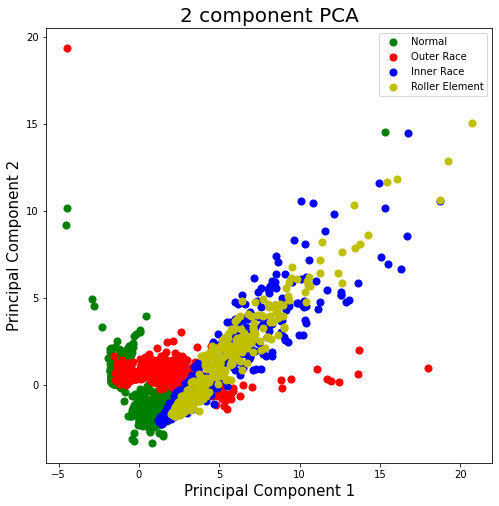

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

In [12]:
sum(pca_2.explained_variance_ratio_)
pca_2.explained_variance_ratio_

array([0.50324716, 0.1975938 ])

## PCA with 3 principal component

In [13]:

X = StandardScaler().fit_transform(X)

pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(df['Fault'])

In [14]:
principalDf

,principal component 1,principal component 2,principal component 3,Fault
0,-1.159377,0.978352,-1.225088,Normal
1,-1.317170,0.406453,-0.417845,Normal
2,-1.568786,0.632448,0.022631,Normal
3,-1.162440,0.912659,-0.092227,Normal
4,-1.032544,1.366981,-0.357196,Normal
...,...,...,...,...
10673,2.432859,-1.318550,-0.433274,Roller Element
10674,2.282629,-1.545205,-0.063938,Roller Element
10675,2.425680,-1.344448,-0.134299,Roller Element
10676,2.501752,-1.130565,-0.392845,Roller Element


In [15]:
%matplotlib qt


fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()

In [16]:
np.sum(pca_3.explained_variance_ratio_)
#pca.explained_variance_ratio_

0.8401433713394302